In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from data_analysis_codes import param
from data_analysis_codes.tools import ODUDLoc
from data_analysis_codes.tools import TAradius
from data_analysis_codes.tools import Cstyle
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import ReadingTools as RRead
plt.style.use(Cstyle.style1)

In [2]:
p = param.pflrw_d3e2_L1821_t1_N16_LCDM()
path = '/home/robynm/simulations/'+p.sim_name+'/'
Lin = LinData.LinData_Class(p, path)
locfinder = ODUDLoc.ODUDLocClass(p)
TAr = TAradius.TA_Class(p, Lin, locfinder.findlocations()[0])

 read time file


Text(0, 0.5, 'z')

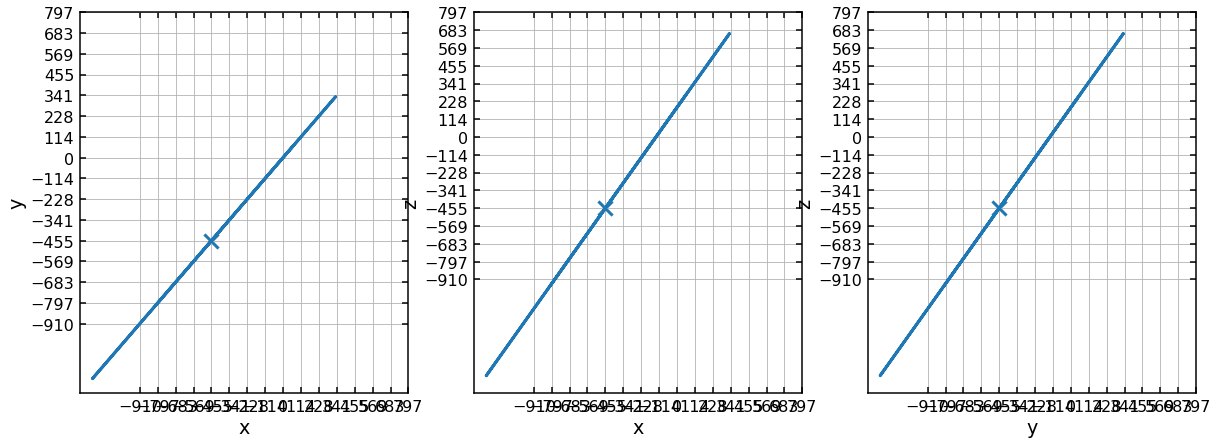

In [3]:
theta = np.pi/4
phi = np.pi/4
                      
dxfac = np.sqrt(3)


x = TAr.xOD-TAr.r_possible*np.sin(theta)*np.cos(phi)
y = TAr.yOD-TAr.r_possible*np.sin(theta)*np.sin(phi)
z = TAr.zOD-TAr.r_possible*np.cos(theta)

r = list(set(np.sqrt((-p.L/2-x)**2+(-p.L/2-y)**2+(-p.L/2-z)**2)))
x = np.array([i for _,i in sorted(zip(r,x))])
y = np.array([i for _,i in sorted(zip(r,y))])
z = np.array([i for _,i in sorted(zip(r,z))])

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1, 3, 1)
ax.plot(x, y)
ax.scatter(TAr.xOD,TAr.yOD, marker='x', s=200)
ax.set_xticks(Lin.d3xyz)
ax.set_yticks(Lin.d3xyz)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax = fig.add_subplot(1, 3, 2)
ax.plot(x, z)
ax.scatter(TAr.xOD,TAr.zOD, marker='x', s=200)
ax.set_xticks(Lin.d3xyz)
ax.set_yticks(Lin.d3xyz)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('z')

ax = fig.add_subplot(1, 3, 3)
ax.plot(y, z)
ax.scatter(TAr.yOD,TAr.zOD, marker='x', s=200)
ax.set_xticks(Lin.d3xyz)
ax.set_yticks(Lin.d3xyz)
ax.grid()
ax.set_xlabel('y')
ax.set_ylabel('z')

1 1 1
45.0 45.0


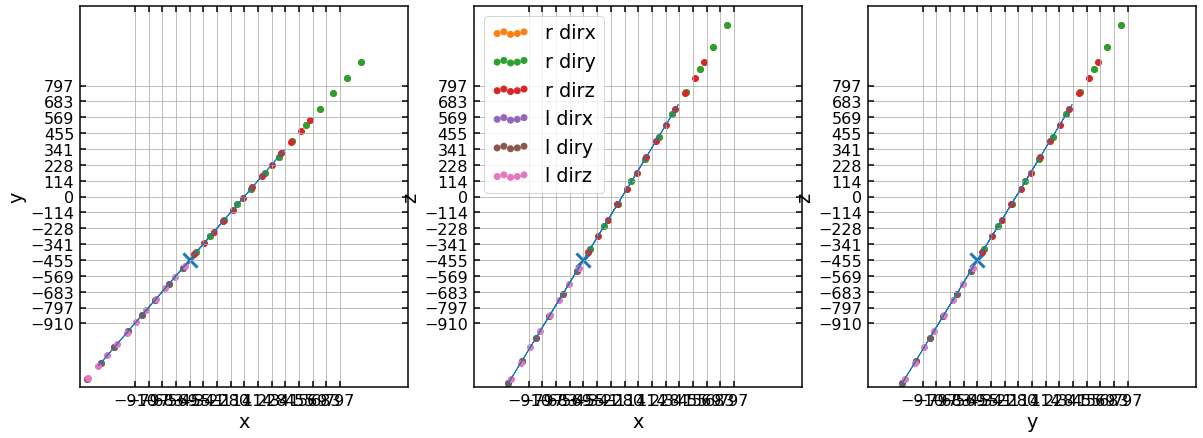

In [4]:
rmax = dxfac*p.L/2
xmin = -1.5*p.L/2
xmax = 1.5*p.L/2

signx = -1 if phi>np.pi/2 and phi<3*np.pi/2 else 1
signy = 1 if phi<=np.pi else -1
signz = 1 if theta<=np.pi/2 else -1
print(signx, signy, signz)
    
right_dirx_coordx = np.array([np.ceil(TAr.xOD/p.dx)*p.dx+signx*(p.dx/2+i*p.dx) for i in range(int(rmax/p.dx)) if theta!=0 and phi!=np.pi/2 and phi!=3*np.pi/2])
right_dirx_coordy = TAr.yOD-(TAr.xOD-right_dirx_coordx)*np.tan(phi)
right_dirx_coordz = TAr.zOD+RRead.safe_division(np.sqrt((TAr.xOD-right_dirx_coordx)**2+(TAr.yOD-right_dirx_coordy)**2),np.tan(theta))

left_dirx_coordx = np.array([np.floor(TAr.xOD/p.dx)*p.dx-signx*(p.dx/2+i*p.dx) for i in range(int(rmax/p.dx)) if theta!=0 and phi!=np.pi/2 and phi!=3*np.pi/2])
left_dirx_coordy = TAr.yOD-(TAr.xOD-left_dirx_coordx)*np.tan(phi)
left_dirx_coordz = TAr.zOD-RRead.safe_division(np.sqrt((TAr.xOD-left_dirx_coordx)**2+(TAr.yOD-left_dirx_coordy)**2),np.tan(theta))
   
right_diry_coordy = np.array([np.ceil(TAr.yOD/p.dx)*p.dx+signy*(p.dx/2+i*p.dx) for i in range(int(rmax/p.dx)) if theta!=0 and phi!=0 and phi!=np.pi])
right_diry_coordx = TAr.xOD-RRead.safe_division((TAr.yOD-right_diry_coordy), np.tan(phi))
right_diry_coordz = TAr.zOD+RRead.safe_division(np.sqrt((TAr.xOD-right_diry_coordx)**2+(TAr.yOD-right_diry_coordy)**2),np.tan(theta))

left_diry_coordy = np.array([np.floor(TAr.yOD/p.dx)*p.dx-signy*(p.dx/2+i*p.dx) for i in range(int(rmax/p.dx)) if theta!=0 and phi!=0 and phi!=np.pi])
left_diry_coordx = TAr.xOD-RRead.safe_division((TAr.yOD-left_diry_coordy),np.tan(phi))
left_diry_coordz = TAr.zOD-RRead.safe_division(np.sqrt((TAr.xOD-left_diry_coordx)**2+(TAr.yOD-left_diry_coordy)**2),np.tan(theta))

right_dirz_coordz = np.array([np.ceil(TAr.zOD/p.dx)*p.dx+signz*(p.dx/2+i*p.dx) for i in range(int(rmax/p.dx)) if theta!=np.pi/2])
right_dirz_coordx = TAr.xOD-(TAr.zOD-right_dirz_coordz)*np.cos(phi)*np.tan(theta)
right_dirz_coordy = TAr.yOD-(TAr.zOD-right_dirz_coordz)*np.sin(phi)*np.tan(theta)

left_dirz_coordz = np.array([np.ceil(TAr.zOD/p.dx)*p.dx-signz*(p.dx/2+i*p.dx) for i in range(int(rmax/p.dx)) if theta!=np.pi/2])
left_dirz_coordx = TAr.xOD-(TAr.zOD-left_dirz_coordz)*np.cos(phi)*np.tan(theta)
left_dirz_coordy = TAr.yOD-(TAr.zOD-left_dirz_coordz)*np.sin(phi)*np.tan(theta)

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1, 3, 1)
ax.plot(x, y, linewidth=1)
ax.scatter(TAr.xOD,TAr.zOD, marker='x', s=200)

ax.scatter(right_dirx_coordx, right_dirx_coordy)
ax.scatter(right_diry_coordx, right_diry_coordy)
ax.scatter(right_dirz_coordx, right_dirz_coordy)

ax.scatter(left_dirx_coordx, left_dirx_coordy)
ax.scatter(left_diry_coordx, left_diry_coordy)
ax.scatter(left_dirz_coordx, left_dirz_coordy)

ax.set_xticks(Lin.d3xyz)
ax.set_yticks(Lin.d3xyz)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)

ax = fig.add_subplot(1, 3, 2)
ax.plot(x, z, linewidth=1)
ax.scatter(TAr.xOD,TAr.zOD, marker='x', s=200)

ax.scatter(right_dirx_coordx, right_dirx_coordz, label='r dirx')
ax.scatter(right_diry_coordx, right_diry_coordz, label='r diry')
ax.scatter(right_dirz_coordx, right_dirz_coordz, label='r dirz')

ax.scatter(left_dirx_coordx, left_dirx_coordz, label='l dirx')
ax.scatter(left_diry_coordx, left_diry_coordz, label='l diry')
ax.scatter(left_dirz_coordx, left_dirz_coordz, label='l dirz')

ax.set_xticks(Lin.d3xyz)
ax.set_yticks(Lin.d3xyz)
ax.grid()
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)

ax = fig.add_subplot(1, 3, 3)
ax.plot(y, z, linewidth=1)
ax.scatter(TAr.xOD,TAr.zOD, marker='x', s=200)

ax.scatter(right_dirx_coordy, right_dirx_coordz)
ax.scatter(right_diry_coordy, right_diry_coordz)
ax.scatter(right_dirz_coordy, right_dirz_coordz)

ax.scatter(left_dirx_coordy, left_dirx_coordz)
ax.scatter(left_diry_coordy, left_diry_coordz)
ax.scatter(left_dirz_coordy, left_dirz_coordz)

ax.set_xticks(Lin.d3xyz)
ax.set_yticks(Lin.d3xyz)
ax.grid()
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)
print(theta*180/np.pi, phi*180/np.pi)

In [5]:
right_coordx = [TAr.xOD]+list(right_dirx_coordx)+list(right_diry_coordx)+list(right_dirz_coordx)
right_coordy = [TAr.yOD]+list(right_dirx_coordy)+list(right_diry_coordy)+list(right_dirz_coordy)
right_coordz = [TAr.zOD]+list(right_dirx_coordz)+list(right_diry_coordz)+list(right_dirz_coordz)
right_radius = [np.sqrt((TAr.xOD-xi)**2+(TAr.yOD-yi)**2+(TAr.zOD-zi)**2) for xi,yi,zi in zip(right_coordx, right_coordy, right_coordz)]
right_radiustest = [np.sqrt((xi)**2+(yi)**2+(zi)**2) for xi,yi,zi in zip(right_coordx, right_coordy, right_coordz)]

right_coordx = [i for _,i in sorted(zip(right_radius, right_coordx))]
right_coordy = [i for _,i in sorted(zip(right_radius, right_coordy))]
right_coordz = [i for _,i in sorted(zip(right_radius, right_coordz))]

right_weighted_dx = [np.sqrt((right_coordx[i+1]-right_coordx[i])**2+(right_coordy[i+1]-right_coordy[i])**2+(right_coordz[i+1]-right_coordz[i])**2) for i in range(len(right_coordx)-1)]

# p.dx/2
right_ix = [np.argmin(abs(Lin.d3xyz-i)) if i<p.L/2 and i>-p.L/2 else np.argmin(abs(Lin.d3xyz-i+np.sign(i)*p.L)) for i in right_coordx]
right_iy = [np.argmin(abs(Lin.d3xyz-i)) if i<p.L/2 and i>-p.L/2 else np.argmin(abs(Lin.d3xyz-i+np.sign(i)*p.L)) for i in right_coordy]
right_iz = [np.argmin(abs(Lin.d3xyz-i)) if i<p.L/2 and i>-p.L/2 else np.argmin(abs(Lin.d3xyz-i+np.sign(i)*p.L)) for i in right_coordz]
right_indices = [(ix, iy, iz) for ix, iy, iz in zip(right_ix, right_iy, right_iz)]

In [3]:
p = param.pflrw_d3e2_L1821_t1_N32_LCDM()
path = '/home/robynm/simulations/'+p.sim_name+'/'
Lin = LinData.LinData_Class(p, path)
locfinder = ODUDLoc.ODUDLocClass(p)
TAr = TAradius.TA_Class(p, Lin, locfinder.findlocations()[0])

 read time file


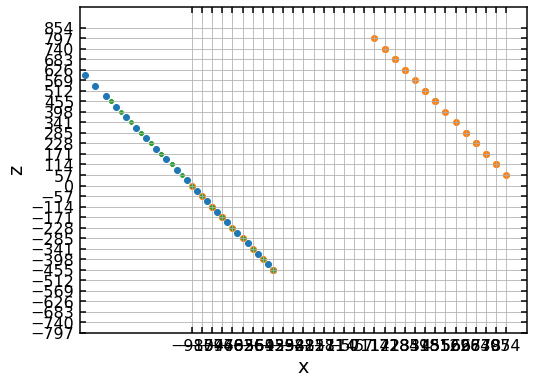

In [18]:
x = [-455.25, -483.703125, -540.609375, -597.515625, -654.421875, -711.328125, -768.234375, -825.140625, -882.046875, -938.953125, -995.8593749999999, -1052.765625, -1109.671875, -1166.578125, -1223.484375, -1280.390625, -1337.296875, -1394.203125, -1451.109375, -1508.0156249999998, -1564.9218749999998, -1621.8281249999998, -1678.7343749999998]
y = [-455.25, -455.25, -455.25, -455.25, -455.25, -455.24999999999994, -455.24999999999994, -455.24999999999994, -455.24999999999994, -455.24999999999994, -455.24999999999994, -455.24999999999994, -455.24999999999994, -455.2499999999999, -455.2499999999999, -455.2499999999999, -455.2499999999999, -455.2499999999999, -455.2499999999999, -455.2499999999999, -455.2499999999999, -455.24999999999983, -455.24999999999983]
z = [-455.25, -426.796875, -369.890625, -312.984375, -256.078125, -199.171875, -142.265625, -85.359375, -28.453125, 28.453125, 85.359375, 142.265625, 199.171875, 256.078125, 312.984375, 369.890625, 426.796875, 483.703125, 540.609375, 597.515625, 654.421875, 711.328125, 768.234375]
idx = [(8, 8, 8), (7, 8, 9), (6, 8, 10), (5, 8, 11), (4, 8, 12), (3, 8, 13), (2, 8, 14), (1, 8, 15), (0, 8, 16), (31, 8, 17), (30, 8, 18), (29, 8, 19), (28, 8, 20), (27, 8, 21), (26, 8, 22), (25, 8, 23), (24, 8, 24), (23, 8, 25), (22, 8, 26), (21, 8, 27), (20, 8, 28), (19, 8, 29)]
#[(8, 8, 8), (7, 8, 9), (6, 8, 10), (5, 8, 11), (4, 8, 12), (3, 8, 13), (2, 8, 14), (1, 8, 15)]
imax = 7
xi = [i[0] for i in idxl]
zi = [i[2] for i in idxl]


plt.scatter(x,z)
plt.scatter(Lin.d3xyz[xi], Lin.d3xyz[zi])
plt.scatter(TAr.xyz_periodic(xi)[0], TAr.xyz_periodic(zi)[0], marker='x', s=10)
#plt.scatter(TAr.xyz_periodic(iyr, dxfac), TAr.xyz_periodic(izr, dxfac))
#plt.xlim(-455.25-4*p.dx, -455.25+p.dx)
#plt.ylim(-455.25-p.dx, -455.25+5*p.dx)
plt.xlabel('x')
plt.ylabel('z')
plt.xticks([-p.L/2+i*p.dx for i in range(32)])
plt.yticks([-p.L/2+i*p.dx for i in range(32)])
plt.xlim(-p.L/2-11*p.dx, p.L/2+1*p.dx)
plt.ylim(-p.L/2+2*p.dx, p.L/2+1*p.dx)
plt.grid()

In [88]:
def xyz_periodic(i_all, dxfac, cut=True, boundary_crossed=False):
        if isinstance(i_all, (int, float, np.generic)):
            i_all = [i_all]
        xyz_return = []
        for i in i_all:
            if i<Lin.N:
                if cut and Lin.d3xyz[i]>p.L/4:
                    xyz_return += [Lin.d3xyz[0] - (p.L/2-Lin.d3xyz[i])]
                    boundary_crossed=True
                elif boundary_crossed:
                    xyz_return += [Lin.d3xyz[0] - (p.L/2-Lin.d3xyz[i])]
                else:
                    xyz_return += [Lin.d3xyz[i]]
            else:
                xyz_return += [Lin.d3xyz[0] - ((Lin.N-1)-i)*p.dx]
                
        if len(xyz_return)==1:
            return xyz_return[0]
        else:
            return np.array(xyz_return)

In [89]:
xyz_periodic([4, 3, 2, 1, 0, 15, 14, 13, 12, 11, 10, 9], dxfac)

array([ -455.25  ,  -569.0625,  -682.875 ,  -796.6875,  -910.5   ,
       -1024.3125, -1138.125 , -1251.9375, -1365.75  , -1479.5625,
       -1593.375 , -1707.1875])

In [52]:
left_avz = [np.average([zl[i], zl[i+1]]) for i in range(len(zl)-1)]
zi = [np.argmin(abs(Lin.d3xyz-i)) if -(p.L+p.dx)/2<=i and i<=(p.L+p.dx)/2 else np.argmin(abs(Lin.d3xyz-i+np.sign(i)*p.L)) for i in left_avz]
left_avy = [np.average([yl[i], yl[i+1]]) for i in range(len(yl)-1)]
yi = [np.argmin(abs(Lin.d3xyz-i)) if -(p.L+p.dx)/2<=i and i<=(p.L+p.dx)/2 else np.argmin(abs(Lin.d3xyz-i+np.sign(i)*p.L)) for i in left_avy]

In [23]:
TAr.xyz_periodic(left_iz, dxfac)

-910.5

In [35]:
left_avz[i], left_avy[i]

(-912.5221013344849, -778.5902037010363)

In [42]:
Lin.d3xyz

array([-910.5   , -796.6875, -682.875 , -569.0625, -455.25  , -341.4375,
       -227.625 , -113.8125,    0.    ,  113.8125,  227.625 ,  341.4375,
        455.25  ,  569.0625,  682.875 ,  796.6875])

In [51]:
i = -796.6875-*p.dx/2
np.argmin(abs(Lin.d3xyz-i)) if -(p.L+p.dx)/2<=i and i<=(p.L+p.dx)/2 else np.argmin(abs(Lin.d3xyz-i+np.sign(i)*p.L))

1

In [47]:
i

-853.59375

In [9]:
left_coordx = [TAr.xOD]+list(left_dirx_coordx)+list(left_diry_coordx)+list(left_dirz_coordx)
left_coordy = [TAr.zOD]+list(left_dirx_coordy)+list(left_diry_coordy)+list(left_dirz_coordy)
left_coordz = [TAr.zOD]+list(left_dirx_coordz)+list(left_diry_coordz)+list(left_dirz_coordz)
left_radius = [np.sqrt((xi-TAr.xOD)**2+(yi-TAr.yOD)**2+(zi-TAr.zOD)**2) for xi,yi,zi in zip(left_coordx, left_coordy, left_coordz)]
left_coordx = [i for _,i in sorted(zip(left_radius, left_coordx))]
left_coordy = [i for _,i in sorted(zip(left_radius, left_coordy))]
left_coordz = [i for _,i in sorted(zip(left_radius, left_coordz))]

left_weighted_dx = [np.sqrt((left_coordx[i+1]-left_coordx[i])**2+(left_coordy[i+1]-left_coordy[i])**2+(left_coordz[i+1]-left_coordz[i])**2) for i in range(len(left_coordx)-1)]

left_ix = [np.argmin(abs(Lin.d3xyz-i)) if i<p.L/2 and i>-p.L/2 else np.argmin(abs(Lin.d3xyz-i+np.sign(i)*p.L)) for i in left_coordx]
left_iy = [np.argmin(abs(Lin.d3xyz-i)) if i<p.L/2 and i>-p.L/2 else np.argmin(abs(Lin.d3xyz-i+np.sign(i)*p.L)) for i in left_coordy]
left_iz = [np.argmin(abs(Lin.d3xyz-i)) if i<p.L/2 and i>-p.L/2 else np.argmin(abs(Lin.d3xyz-i+np.sign(i)*p.L)) for i in left_coordz]
left_indices = [(ix, iy, iz) for ix, iy, iz in zip(left_ix, left_iy, left_iz)]

In [10]:
left_coordx,left_coordy,left_coordz

([-455.25,
  -495.48879526689694,
  -512.15625,
  -512.15625,
  -575.9663858006909,
  -625.96875,
  -625.96875,
  -656.4439763344849,
  -736.9215668682788,
  -739.78125,
  -739.78125,
  -817.3991574020727,
  -853.59375,
  -853.59375,
  -897.8767479358667,
  -967.40625,
  -967.4062500000001,
  -978.3543384696605,
  -1058.8319290034544,
  -1081.21875,
  -1081.21875,
  -1139.3095195372484,
  -1195.03125,
  -1195.03125,
  -1219.7871100710422,
  -1300.2647006048364,
  -1308.84375,
  -1308.84375,
  -1380.7422911386302,
  -1422.65625,
  -1422.65625,
  -1461.2198816724242,
  -1536.46875,
  -1536.4687500000002,
  -1650.2812500000002,
  -1650.28125,
  -1764.09375,
  -1764.0937500000002,
  -1877.90625,
  -1877.9062500000002],
 [-455.25,
  -495.48879526689694,
  -512.15625,
  -512.15625,
  -575.9663858006909,
  -625.96875,
  -625.96875,
  -656.4439763344848,
  -736.9215668682787,
  -739.78125,
  -739.78125,
  -817.3991574020727,
  -853.59375,
  -853.59375,
  -897.8767479358665,
  -967.406249999999

In [11]:
zTA = [-521.0774756202981, -578.131011388513, -632.0593775670505, -679.8166081808033, -693.993059368628, -721.276038277986, -745.7775619519588, -767.6920716503363, -787.1943193533227, -815.4495756757865, -834.7139166384732, -852.287709938899, -868.2580196380045, -882.7026940893462, -895.690942532716, -932.5343179333178, -948.9554772051284, -963.9685115971059, -977.6144726224603, -989.9301740195308, -1000.9487828480204, -1041.1055827520865, -1057.2773223470283, -1072.0948475280475, -1085.6005384916218, -1097.8307900254295, -1108.8117455935067, -1118.5479249113946]

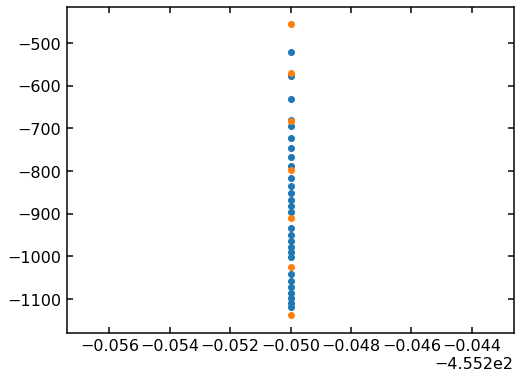

In [12]:
z = [-455.25-p.dx*i for i in range(7)]
plt.scatter([-455.25]*len(zTA), zTA)
plt.scatter([-455.25]*len(z), z)
#plt.ylim(-1200, -900)

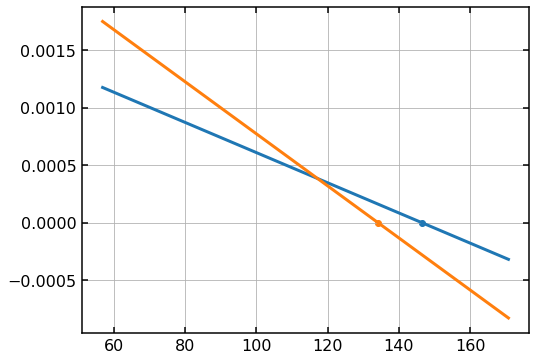

In [13]:
r = [56.90625, 170.71875]
kpre = [0.0011757522819934238, -0.0003201270361860879]
kpost = [0.0017502228739508996, -0.0008303897258250988]
plt.plot(r, kpre)
plt.scatter(146.3622007362065, 0)
plt.plot(r, kpost)
plt.scatter(134.09615477641916, 0)
plt.grid()

In [14]:
np.sqrt(2)*(-455.25+164), np.sqrt(2)*(-455.25+744)

(-411.88970004116396, 408.3541661352312)

In [15]:
i = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
TAr.xyz_periodic(i, 1, cut=False)

array([-910.5   , -796.6875, -682.875 , -569.0625, -455.25  , -341.4375,
       -227.625 , -113.8125,    0.    ,  113.8125,  227.625 ,  341.4375,
        455.25  ,  569.0625,  682.875 ,  796.6875])

In [16]:
910.5+113.8125

1024.3125

In [2]:
import numpy as np
np.cos(np.pi/4), np.sin(np.pi/4)

(0.7071067811865476, 0.7071067811865475)

In [3]:
np.sqrt(2)/2

0.7071067811865476